In [354]:
import yfinance as yf
import pandas as pd
import pandas_datareader as pdr
import os
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',100)

In [357]:
#Reading in histroical stock data
stock = "ORLY"
aapl = yf.Ticker(stock)

# get all stock info (like earnings info too)
info = aapl.info
info = pd.DataFrame(info)

# get historical market data
hist = aapl.history(period="5yr")
news = aapl.news

In [380]:
#reads in apple and nasdaq historical info
data = yf.download("NDAQ AAPL", period = '1y', prepost=True, repair=True)
#historica apple data
hist = aapl.history(period="max", interval='1d')
hist.index = pd.to_datetime(hist.index)
hist.index = hist.index.strftime('%Y-%m-%d')
hist
hist1 = hist.loc[hist.index >'2023-01-01']

[*********************100%***********************]  2 of 2 completed


In [364]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-04-23,2.437500,2.437500,2.343750,2.406250,16484800,0.0,0.0
1993-04-26,2.375000,2.406250,2.343750,2.343750,3334400,0.0,0.0
1993-04-27,2.375000,2.375000,2.281250,2.312500,2046400,0.0,0.0
1993-04-28,2.343750,2.343750,2.281250,2.281250,897600,0.0,0.0
1993-04-29,2.281250,2.343750,2.281250,2.312500,844800,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-31,886.169983,908.179993,873.780029,903.309998,1186700,0.0,0.0
2023-06-01,903.309998,909.500000,892.400024,895.280029,502600,0.0,0.0
2023-06-02,896.000000,903.130005,891.380005,895.340027,542400,0.0,0.0


In [335]:
hist_calc = hist
hist_calc['returns'] = np.log(hist_calc.Close/hist_calc.Close.shift(1))
hist_calc['histVars'] = np.var(hist_calc['returns'], ddof=1)
hist_calc['histVol']= np.sqrt(hist_calc['histVars'])

hist_calc

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns,histVars,histVol
Date,,,,,,,,,,
1993-04-23,2.437500,2.437500,2.343750,2.406250,16484800,0.0,0.0,NaN,0.000449,0.021183
1993-04-26,2.375000,2.406250,2.343750,2.343750,3334400,0.0,0.0,-0.026317,0.000449,0.021183
1993-04-27,2.375000,2.375000,2.281250,2.312500,2046400,0.0,0.0,-0.013423,0.000449,0.021183
1993-04-28,2.343750,2.343750,2.281250,2.281250,897600,0.0,0.0,-0.013606,0.000449,0.021183
1993-04-29,2.281250,2.343750,2.281250,2.312500,844800,0.0,0.0,0.013606,0.000449,0.021183
...,...,...,...,...,...,...,...,...,...,...
2023-05-31,886.169983,908.179993,873.780029,903.309998,1186700,0.0,0.0,-0.027052,0.000449,0.021183
2023-06-01,903.309998,909.500000,892.400024,895.280029,502600,0.0,0.0,-0.008929,0.000449,0.021183
2023-06-02,896.000000,903.130005,891.380005,895.340027,542400,0.0,0.0,0.000067,0.000449,0.021183


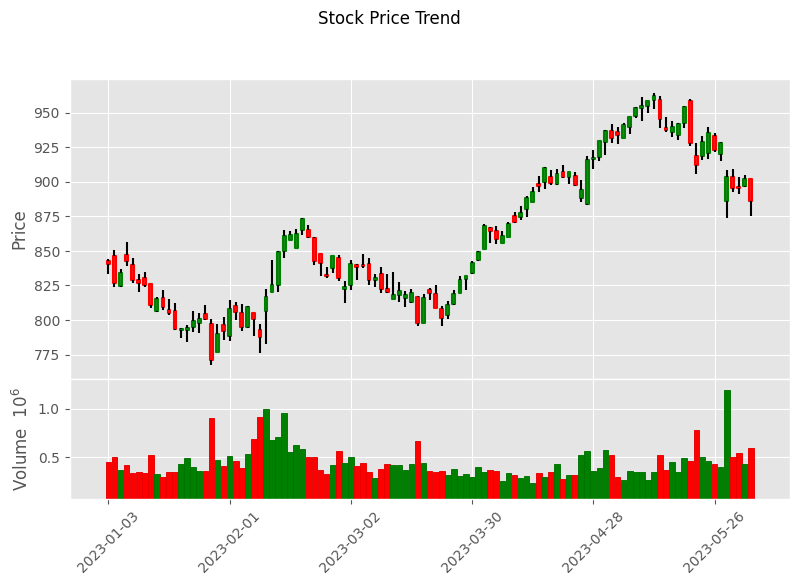

In [381]:
# plt.style.use('ggplot')

# # Prepare data
# dates = hist.index
# close_prices = hist['Close']

# # Create the plot
# plt.figure(figsize=(10, 6))

# plt.plot(dates, close_prices, color='blue', linewidth=2)

# # Customize the plot
# plt.title('ORLY Price Trend')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.grid(True)
# plt.xticks(rotation=45)

import mplfinance as mpf

# Convert index to DatetimeIndex
hist1.index = pd.to_datetime(hist1.index)
# hist1.set_index('Date', inplace=Tarue)

# Set the style and customization options
mc = mpf.make_marketcolors(up='g', down='r', edge='inherit', volume='in')
s = mpf.make_mpf_style(base_mpl_style='ggplot', marketcolors=mc)

# Create the plot
mpf.plot(hist1, type='candle', style=s, title='Stock Price Trend',
         ylabel='Price', volume=True, figratio=(10, 6), figsize=(10, 6),
         datetime_format='%Y-%m-%d', xrotation=45, update_width_config=dict(candle_linewidth=1.5))

# Show the plot
mpf.show()



In [294]:
options = ['2023-06-16',
 '2023-07-21',
 '2023-08-18',
 '2023-11-17',
 '2024-01-19',
 '2024-06-21'

#reading in the data
option_data = {}
for i in options:
    opt = aapl.option_chain(str(i))
    option_data['Options as of_'+str(i)] = opt

In [353]:

calls = {}

puts = {}

# Iterate over the exercise dates. this is creating dicts with the keys as their dates
for date in options:
    # Create a DataFrame for the current exercise date
    dfa = pd.DataFrame(option_data['Options as of_'+str(date)].calls)  # Assuming you want to create a DataFrame for the 'calls' data
    dfb = pd.DataFrame(option_data['Options as of_'+str(date)].puts)
    
    calls['Options calls as of_'+str(date)] = dfa
    puts['Options puts as of_'+str(date)] = dfb
    


#Reading calls and puts into their own dataframes and assigning    
for k, v in calls.items():
    newCall = v
    newCall['Date'] = str(k[20:24])+"-"+str(k[25:27])+"-"+str(k[28:30])
    globals()[f""+str(stock)+"_optionCalls"] = pd.concat(globals()[f""+str(stock)+"_optionCalls"], newCall, ignore_index=True)
        
        
#     globals()[f""+str(stock)+"_optionCalls_"+str(k[20:24])+"_"+str(k[25:27])+"_"+str(k[28:30])] = v
    
# for k, v in puts.items():
#     globals()[f""+str(stock)+"_optionPuts_"+str(k[19:23])+"_"+str(k[24:26])+"_"+str(k[27:29])] = v
    


TypeError: concat() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [347]:

globals()[f""+str(stock)+"_optionCalls"] = pd.DataFrame()

#Reading calls and puts into their own dataframes and assigning    
# for k, v in calls.items():
#     newCall = v
#     newCall['Date'] = str(k[20:24])+"-"+str(k[25:27])+"-"+str(k[28:30])]
#     if pd.DataFrame(.isna():
        
    
    
#     globals()[f""+str(stock)+"_optionCalls_"+str(k[20:24])+"_"+str(k[25:27])+"_"+str(k[28:30])] = v
    
# for k, v in puts.items():
#     globals()[f""+str(stock)+"_optionPuts_"+str(k[19:23])+"_"+str(k[24:26])+"_"+str(k[27:29])] = v
    


In [338]:
calls

{'Options calls as of_2023-06-16':          contractSymbol             lastTradeDate  strike  lastPrice     bid  \
 0   ORLY230616C00730000 2023-05-15 18:54:35+00:00   730.0     216.35  153.00   
 1   ORLY230616C00750000 2023-05-16 13:40:10+00:00   750.0     192.73  133.00   
 2   ORLY230616C00760000 2023-05-17 13:30:11+00:00   760.0     181.17  123.10   
 3   ORLY230616C00790000 2023-05-24 14:31:22+00:00   790.0     143.70   93.30   
 4   ORLY230616C00800000 2023-06-06 15:08:17+00:00   800.0      93.15   83.70   
 5   ORLY230616C00820000 2023-05-31 13:32:44+00:00   820.0      69.65   64.00   
 6   ORLY230616C00830000 2023-05-12 16:36:04+00:00   830.0     132.53   54.00   
 7   ORLY230616C00840000 2023-05-31 13:32:44+00:00   840.0      51.95   45.00   
 8   ORLY230616C00850000 2023-06-06 15:08:17+00:00   850.0      44.65   37.40   
 9   ORLY230616C00860000 2023-05-25 13:32:57+00:00   860.0      67.26   28.60   
 10  ORLY230616C00870000 2023-06-06 17:23:32+00:00   870.0      21.25   19.

In [339]:
ORLY_optionCalls_2023_06_16

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,ORLY230616C00730000,2023-05-15 18:54:35+00:00,730.0,216.35,153.00,162.00,0.000000,0.000000,1.0,3,0.679447,True,REGULAR,USD
1,ORLY230616C00750000,2023-05-16 13:40:10+00:00,750.0,192.73,133.00,142.00,0.000000,0.000000,1.0,1,0.600346,True,REGULAR,USD
2,ORLY230616C00760000,2023-05-17 13:30:11+00:00,760.0,181.17,123.10,132.00,0.000000,0.000000,NaN,0,0.564702,True,REGULAR,USD
3,ORLY230616C00790000,2023-05-24 14:31:22+00:00,790.0,143.70,93.30,102.00,0.000000,0.000000,NaN,1,0.632511,True,REGULAR,USD
4,ORLY230616C00800000,2023-06-06 15:08:17+00:00,800.0,93.15,83.70,93.00,-12.849998,-12.122640,1.0,2,0.613956,True,REGULAR,USD
5,ORLY230616C00820000,2023-05-31 13:32:44+00:00,820.0,69.65,64.00,73.00,0.000000,0.000000,NaN,3,0.511541,True,REGULAR,USD
6,ORLY230616C00830000,2023-05-12 16:36:04+00:00,830.0,132.53,54.00,63.00,0.000000,0.000000,1.0,2,0.459356,True,REGULAR,USD
7,ORLY230616C00840000,2023-05-31 13:32:44+00:00,840.0,51.95,45.00,54.00,0.000000,0.000000,3.0,4,0.429754,True,REGULAR,USD
8,ORLY230616C00850000,2023-06-06 15:08:17+00:00,850.0,44.65,37.40,43.70,-14.739998,-24.818989,1.0,13,0.367011,True,REGULAR,USD
9,ORLY230616C00860000,2023-05-25 13:32:57+00:00,860.0,67.26,28.60,35.70,0.000000,0.000000,1.0,12,0.349311,True,REGULAR,USD
